In [7]:
import numpy as np
import pandas as pd
import os

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv("/content/drive/MyDrive/anomaly_detection/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
## list of columns
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [12]:
## Types of dtypes present in the dataframe
set(list(df.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}

In [13]:
## to identify which columns has the "Object" data
categorical_columns=[col for col in df.columns if df[col].dtype=="O"]
categorical_columns

[' Label']

In [14]:
## Categorical Data
df_Categorical=df[categorical_columns]
df_Categorical

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
225740,BENIGN
225741,BENIGN
225742,BENIGN
225743,BENIGN


In [15]:
# Numerical data
df_Numerical=df.copy()
df_Numerical.drop([" Label"],axis=1,inplace=True)
## cols = df.select_dtypes(include=['float64','int64']).columns

df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


(DDoS      128027
 BENIGN     97718
 Name:  Label, dtype: int64,
 <Axes: xlabel=' Label', ylabel='count'>)

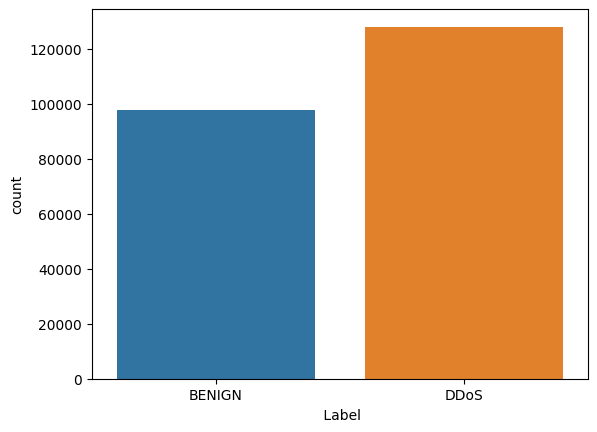

In [16]:
##  To check the Counts of each Class in the dependent Variable
df_Categorical[" Label"].value_counts(),sns.countplot(x=df_Categorical[' Label'])

In [17]:
## To check Unique values in the data
for i in df_Numerical.columns:
    #if df[i].unique()<
    print(f" {i} Column has {df[i].nunique()} unique values and those are {df[i].unique()}\n\n")

  Destination Port Column has 23950 unique values and those are [54865 55054 55055 ... 39950 61301 61326]


  Flow Duration Column has 187752 unique values and those are [    3   109    52 ... 55637 53596 21000]


  Total Fwd Packets Column has 297 unique values and those are [   2    1    3   20   15    4    5    8   29    6   14   41   47   46
   45   27   23   26   51   50   48   52   49   21   42   43   44   78
   53   31   19   69   22   25   24   30   68   40   39   75   28   12
   17   18   13    7   11   38    9 1611   70   10  124   33   34   16
   54  225   56   32  220  103  390   97   58   72  111   85   71   73
   61   55   35  209  205  149  212  108   98   37  188  101   65   36
  114   91  246  100   62  102  105   79  106  122  277   76  126   82
   96  196   84  263   77   93   63   74   81   66  354  175   64  117
  107   92  457   67  142  135  116   60  143  112  120  155  214  201
  187  519  128  136  194  146  216  250  127  352  176  537  104   83
   99   59  1

In [18]:
for i in df_Numerical.columns:
    if df[i].isnull().sum()>0:
        print(i)

Flow Bytes/s


In [20]:
## We are having nan values in this column
df_Numerical["Flow Bytes/s"].isnull().sum()

4

In [21]:
## To check the dependent column data , when the data is nan
#nan_rows = df[df["Flow Bytes/s"].isnull()]
for index, row in df_Numerical.iterrows():
    if pd.isna(row["Flow Bytes/s"]):
        print(row["Flow Bytes/s"],df_Categorical[" Label"].iloc[index])

nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN


In [22]:
## Drop the nan values
df_Numerical.dropna(inplace=True)

To check the Dataframe has infinte values or not


In [23]:
## To check this funtion all columns should be numerical data types like int,float  should not include "Object datatype"
np.all(np.isfinite(df_Numerical.values))

False

From this we funtion , the data contains np.inf value ie, Infinity value in the data

In [25]:
## To check total sum of the infinite values in the data
np.isinf(df_Numerical).values.sum()
## To check all values of dataframe are finite
#np.all(np.isfinite(df.values))
#np.all(np.isinf(df))

60

To know which columns have ifninity values and how many numbers are there and also their index number

In [26]:
import numpy as np

infinite_column_count = {}  # Dictionary to store counts
infinite_Value_index_num = []  # List to store index numbers

# Iterate through the columns
for column in df_Numerical.columns:
    count = 0  # Initialize count for the current column
    for index, value in enumerate(df_Numerical[column]):
        if not np.isfinite(value):
            count += 1  # Increment count for non-numeric (infinite) values
            infinite_Value_index_num.append(index)  # Append the index number
    if count > 0:
        infinite_column_count[column] = count  # Store count in the dictionary

# Convert the list of index numbers to a set to remove duplicates
infinite_Value_index_num = set(infinite_Value_index_num)

# Print the dictionary and the set of index numbers
print("Counts of non-numeric (infinite) values in each column:")
print(f"{infinite_column_count}\n")

print("Index numbers of non-numeric (infinite) values:")
print(infinite_Value_index_num)

Counts of non-numeric (infinite) values in each column:
{'Flow Bytes/s': 30, ' Flow Packets/s': 30}

Index numbers of non-numeric (infinite) values:
{13312, 201234, 13715, 88088, 200346, 214428, 174376, 216492, 3375, 33327, 214449, 174391, 148281, 65, 203976, 18250, 204235, 194125, 8404, 61526, 213590, 204637, 1890, 189922, 208996, 1767, 130665, 215022, 8056, 55548}


In [27]:
Benign=0
bot=0
for i in infinite_Value_index_num:
    if df_Categorical[" Label"].iloc[i]=="BENIGN":
        Benign+=1
    else:
        bot+=1

print(f" Benign counts are {Benign}\n\n")
print(f" bot counts are {bot}")

 Benign counts are 28


 bot counts are 2


In [28]:
## Replace the infinite values with nan values and then delete each row
df_Numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Numerical.dropna(inplace=True)

In [29]:
## To confirm once again is there any nan or infinite values
## To check total sum of the infinite values in the data
#np.isinf(df_Numerical).values.sum(),np.any(np.isnan(df_Numerical))
np.all(np.isinf(df_Numerical)),np.any(np.isnan(df_Numerical))

(False, False)

In [30]:
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [31]:
df_Numerical.shape,df_Categorical.shape

((225711, 78), (225745, 1))

In [32]:
# Create a list of index numbers from df_Numerical
index_numbers_to_fetch = df_Numerical.index.tolist()

# Fetch the corresponding rows from df_Categorical
df_Categorical = df_Categorical.loc[index_numbers_to_fetch]

# df_Categorical_subset now contains the rows from df_Categorical that correspond to the index numbers in df_Numerical

In [33]:
df_Categorical.shape

(225711, 1)

In [34]:
## Dependent data
y=pd.get_dummies(data=df_Categorical[" Label"], drop_first=True)
y

,DDoS
0,0
1,0
2,0
3,0
4,0
...,...
225740,0
225741,0
225742,0
225743,0


In [35]:
# Independent data
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [36]:
df_Numerical_Scaled_data=pd.DataFrame()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Numerical_Scaled_data[df_Numerical.columns] = scaler.fit_transform(df_Numerical[df_Numerical.columns])

In [37]:
df_Numerical_Scaled_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.837225,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.840109,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.840124,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705548,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.837194,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225706,0.936550,5.166669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225707,0.936611,6.083336e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225708,0.936565,6.333337e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225709,0.935772,4.083335e-07,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now All the values are in one scale , so we can feed this data into model

In [38]:
## Dependent data
X=df_Numerical_Scaled_data

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from sklearn.metrics import *

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [41]:
## The size of Train and test data
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((151226, 78), (151226, 1), (74485, 78), (74485, 1))

In [ ]:
# from sklearn.linear_model import LogisticRegression
# logistic_model = LogisticRegression()
# ## Train the model with training data
# logistic_model.fit(X_train, y_train)

In [42]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Reshape data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
# Predict anomalies
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_binary) * 100
confusion_mat = confusion_matrix(y_test, y_pred_binary)

print("Accuracy is", accuracy)
print("Confusion Matrix")
print(confusion_mat)

In [ ]:
# Create and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict anomalies
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


In [ ]:
# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_binary) * 100
confusion_mat = confusion_matrix(y_test, y_pred_binary)

print("Accuracy is", accuracy)
print("Confusion Matrix")
print(confusion_mat)

For Quick Analysis and Results


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a function to evaluate LSTM and CNN models
def evaluate_deep_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train, epochs=10, batch_size=32)  # Train the deep learning model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'============================== {model_name} Model Evaluation ==============================')

    # Evaluation on the training set
    accuracy_train = accuracy_score(y_train, (y_train_pred > 0.5).astype(int))
    confusion_matrix_train = confusion_matrix(y_train, (y_train_pred > 0.5).astype(int))
    classification_train = classification_report(y_train, (y_train_pred > 0.5).astype(int))

    print(f'Training - {model_name}')
    print("Model Accuracy (Training):\n", accuracy_train)
    print("Confusion matrix (Training):\n", confusion_matrix_train)
    print("Classification report (Training):\n", classification_train)

    # Evaluation on the test set
    accuracy_test = accuracy_score(y_test, (y_test_pred > 0.5).astype(int))
    confusion_matrix_test = confusion_matrix(y_test, (y_test_pred > 0.5).astype(int))
    classification_test = classification_report(y_test, (y_test_pred > 0.5).astype(int))

    print(f'Test - {model_name}')
    print("Model Accuracy (Test):\n", accuracy_test)
    print("Confusion matrix (Test):\n", confusion_matrix_test)
    print("Classification report (Test):\n", classification_test)


# Evaluate LSTM model
evaluate_deep_model(lstm_model, X_train, y_train, X_test, y_test, 'LSTM')

# Evaluate CNN model
evaluate_deep_model(cnn_model, X_train, y_train, X_test, y_test, 'CNN')
